In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [2]:
crime = pd.read_csv('Prepare the Data DRILL.csv')
crime.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [3]:
#The purpose of this is to separate the commas out of the numbers that is more than 1,000.
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [4]:
crime.dtypes

City                             object
Population                       object
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                          object
Aggravated\nassault              object
Property\ncrime                  object
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [5]:
#This is to make the numbers permanently without the commas
crime['Population'] = crime['Population'].apply(lambda x: convert_number(x))
crime['Murder'] = crime['Murder'].apply(lambda x: convert_number(x))
crime['Robbery'] = crime['Robbery'].apply(lambda x: convert_number(x))
crime['Violent\ncrime'] = crime['Violent\ncrime'].apply(lambda x: convert_number(x))
crime['Property\ncrime'] = crime['Property\ncrime'].apply(lambda x: convert_number(x))
crime['Larceny-\ntheft'] = crime['Larceny-\ntheft'].apply(lambda x: convert_number(x))

In [6]:
#I'm making a new column to make them categorial.
#1=Murder Existed in that county 0=Murder Did Not Exist
crime['Robbery?'] = np.where(crime['Robbery']>0, 1, 0)
crime['Murder?'] = np.where(crime['Murder']>0, 1, 0)

In [7]:
crime.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery?,Murder?
0,Adams Village,1861.000,0.000,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000,0,0
1,Addison Town and Village,2577.000,3.000,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000,0,0
2,Akron Village,2846.000,3.000,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000,0,0
3,Albany,97956.000,791.000,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan,1,1
4,Albion Village,6388.000,23.000,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan,1,0


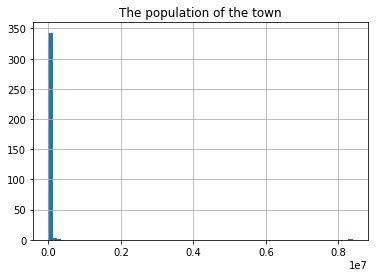

The median:  7233.5
The mean: 40037.63218390805
The standard deviation:  450037.3675209857
Outliers above the limit are:  907308.2350419714


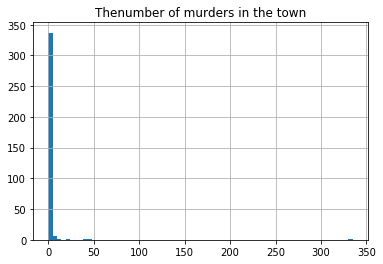

The median:  0.0
The mean: 1.5660919540229885
The standard deviation:  18.303672792887753
Outliers above the limit are:  36.607345585775505


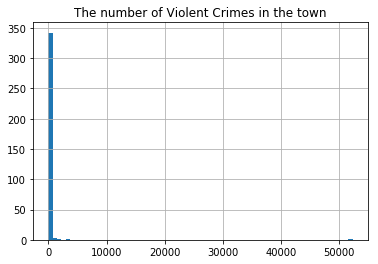

The median:  6.0
The mean: 201.5948275862069
The standard deviation:  2815.268503874344
Outliers above the limit are:  5636.537007748688


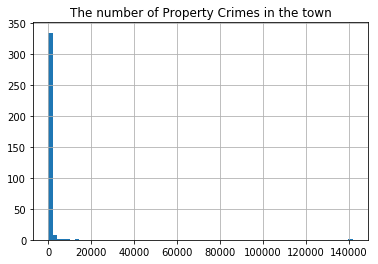

The median:  112.5
The mean: 792.6063218390805
The standard deviation:  7659.724745633149
Outliers above the limit are:  15431.949491266298


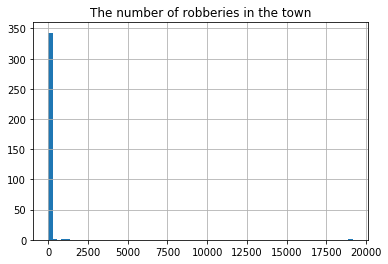

The median:  1.0
The mean: 72.90229885057471
The standard deviation:  1031.0328732955247
Outliers above the limit are:  2063.0657465910494


In [8]:
#Distributing all the variables
crime['Population'].hist(bins=70)
plt.title('The population of the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Population.mean()
median = crime.Population.median()
std = crime.Population.std()
population = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', population)

#Distributing all the variables
crime['Murder'].hist(bins=70)
plt.title('Thenumber of murders in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Murder.mean()
median = crime.Murder.median()
std = crime.Murder.std()
murders = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', murders)


#Distributing all the variables
crime['Violent\ncrime'].hist(bins=70)
plt.title('The number of Violent Crimes in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime['Violent\ncrime'].mean()
median = crime['Violent\ncrime'].median()
std = crime['Violent\ncrime'].std()
violentcrimes = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', violentcrimes)

#Distributing all the variables
crime['Property\ncrime'].hist(bins=70)
plt.title('The number of Property Crimes in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime['Property\ncrime'].mean()
median = crime['Property\ncrime'].median()
std = crime['Property\ncrime'].std()
propertycrimes = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', propertycrimes)

#Distributing all the variables
crime.Robbery.hist(bins=70)
plt.title('The number of robberies in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Robbery.mean()
median = crime.Robbery.median()
std = crime.Robbery.std()
robberies = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', robberies)

In [9]:
#Removing Outliers#
crime.Population = crime.Population.map(lambda x: x if x < population else None)
crime.Murder = crime.Murder.map(lambda x: x if x < murders else None)
crime.Robbery = crime.Robbery.map(lambda x: x if x < robberies else None)
crime['Violent\ncrime'] = crime['Violent\ncrime'].map(lambda x: x if x < violentcrimes else None)
crime['Property\ncrime'] = crime['Property\ncrime'].map(lambda x: x if x < propertycrimes else None)

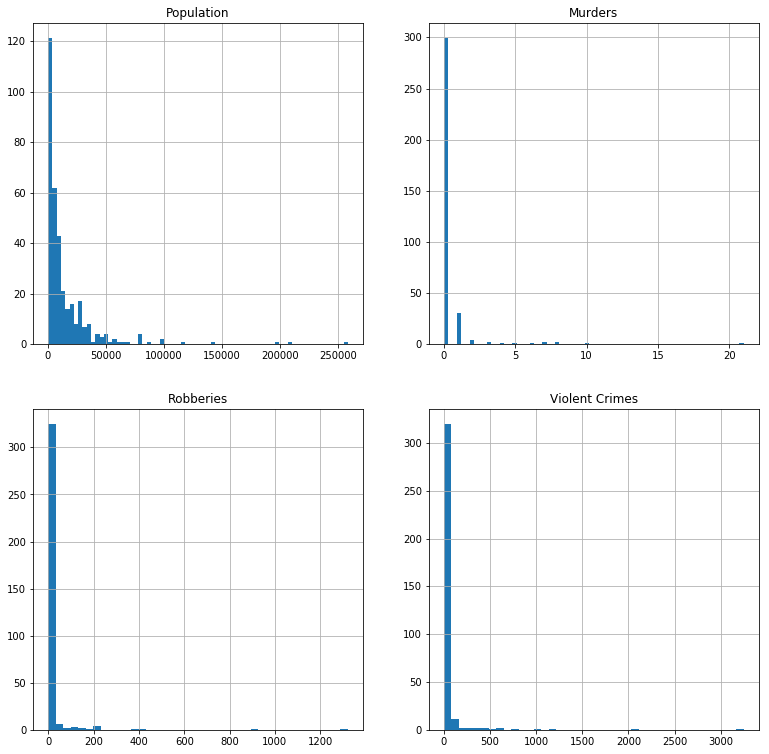

In [10]:
plt.figure(figsize=(13,13))
plt.subplot(221)
crime['Population'].hist(bins=70)
plt.title('Population')

plt.subplot(222)
crime['Murder'].hist(bins=70)
plt.title('Murders')

plt.subplot(223)
crime['Robbery'].hist(bins=40)
plt.title('Robberies')

plt.subplot(224)
crime['Violent\ncrime'].hist(bins=40)
plt.title('Violent Crimes')

plt.show()

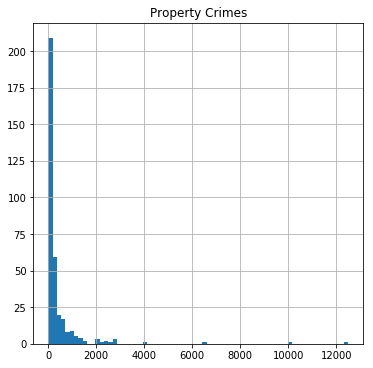

In [11]:
plt.figure(figsize=(13,13))
plt.subplot(221)
crime['Property\ncrime'].hist(bins=70)
plt.title('Property Crimes')

plt.show()

In [13]:
features = crime[['Population', 'Murder?', 'Robbery?', 'Violent\ncrime', 'Property\ncrime']].dropna()
features.head()

,Population,Murder?,Robbery?,Violent crime,Property crime
0,1861.000,0,0,0.000,12.000
1,2577.000,0,0,3.000,24.000
2,2846.000,0,0,3.000,16.000
3,97956.000,1,1,791.000,4090.000
4,6388.000,0,1,23.000,223.000


In [14]:
# Building
regression = linear_model.LinearRegression()
Y = features['Property\ncrime']
X = features[['Population', 'Murder?', 'Robbery?', 'Violent\ncrime']]

# Fitting
regression.fit(X, Y)

# Calculations
print('The coefficients are:', regression.coef_, '.')
print('The intercept is:', regression.intercept_, '.')
print('The R-squared is:', regression.score(X, Y), '.')

The coefficients are: [ 1.15647206e-02 -5.86556491e+00  1.00927757e+02  2.99806687e+00] .
The intercept is: -12.010327784847163 .
The R-squared is: 0.9283335755221495 .


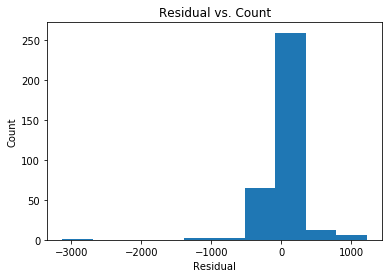

In [15]:
predicted = regression.predict(X).ravel()
actual = features['Property\ncrime']

residual = actual - predicted

plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual vs. Count')
plt.show()

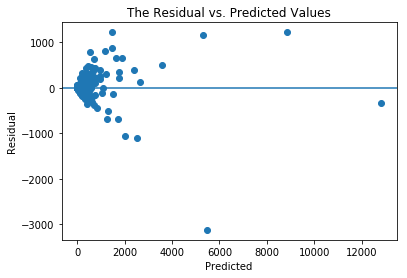

In [16]:
#Now, I'm showing how homoscedasicity works.
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('The Residual vs. Predicted Values')
plt.show()

,Population,Murder?,Robbery?,Violent crime
Population,1.000,0.503,0.344,0.829
Murder?,0.503,1.000,0.311,0.406
Robbery?,0.344,0.311,1.000,0.168
Violent\ncrime,0.829,0.406,0.168,1.000


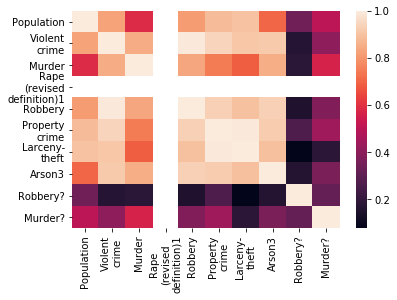

In [17]:
#These are the correlations for the x variables
correlation_matrix = X.corr()
display(correlation_matrix)
sns.heatmap(crime.corr())

In [18]:
#Now I will be using PCA concepts#
X_data = X
X_data.head()

,Population,Murder?,Robbery?,Violent crime
0,1861.000,0,0,0.000
1,2577.000,0,0,3.000
2,2846.000,0,0,3.000
3,97956.000,1,1,791.000
4,6388.000,0,1,23.000


In [19]:
Y_target = Y
Y_target.head()

0     12.000
1     24.000
2     16.000
3   4090.000
4    223.000
Name: Property\ncrime, dtype: float64

In [20]:
train_crime, test_crime, train_target, test_target = train_test_split(
    X_data, Y_target, test_size=0.20, random_state=0)

scaler = StandardScaler()

scaler.fit(train_crime)

train_crime = scaler.transform(train_crime)
test_crime = scaler.transform(test_crime)

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  
c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [21]:
pca = PCA(n_components=3)
pca.fit(train_crime)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
regression = linear_model.LinearRegression()
regression.fit(train_crime, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print('The coefficients are:', regression.coef_, '.')
print('The intercept is:', regression.intercept_, '.')
print('The R-squared is:', regression.score(train_crime, train_target), '.')

The coefficients are: [257.54048852   5.18962147  59.32978594 668.60494927] .
The intercept is: 371.72563176895306 .
The R-squared is: 0.9091952317192017 .


In [24]:
#Measuring Performance to see how accurate the model is.
regression.predict(test_crime)

array([  23.41395115, 1056.15135332, 2568.69081508,  177.72848546,
        189.83884745,  177.60152594,  489.53125271,  376.02545009,
        171.80586758,   32.38695795,  209.45309595,  330.18410978,
         21.20868162,  115.00543808,   39.1047569 ,   67.51807965,
        331.01779381,   23.90887884,  319.0498412 ,  317.20978745,
         19.99538117,  208.11791497,  368.94812251,  227.52267798,
         22.51889344,   25.89281699,  154.24073252,  402.35220565,
         25.17190472,  373.45961798,  138.27633047,   61.74485095,
        242.5279115 ,   22.93658704,   76.36920592,  366.87236726,
         18.26239676,   35.82795761,  308.1208307 ,   38.8959101 ,
        179.299809  ,  238.30844277,   14.35165148,   49.72378183,
        317.585587  ,  201.87218825,  109.44402147,  840.66546371,
         76.25727048, 8402.85572586,  222.33366984,  185.39759101,
       1622.74087517,  290.13672467,  152.98511223,  268.50383667,
         57.41619917, 2337.50609072, 1522.1444795 ,   41.92175

In [25]:
cross = cross_val_score(regression, test_crime, test_target, cv=5)
print(cross)

[0.98892737 0.54189431 0.75686177 0.9896933  0.97300494]


In [26]:
print("The accuracy for the model is: %0.2f (+/- %0.2f)" % (cross.mean(), cross.std() * 2))

The accuracy for the model is: 0.85 (+/- 0.36)
